In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../data", one_hot=True) # y labels are oh-encoded

n_train = mnist.train.num_examples # 55,000
n_validation = mnist.validation.num_examples # 5000
n_test = mnist.test.num_examples # 10,000

In [2]:
n_input = 784   # input layer (28x28 pixels)
n_hidden1 = 512 # 1st hidden layer
# n_hidden1 = 1024 # 1st hidden layer
n_hidden2 = 256 # 2nd hidden layer
# n_hidden3 = 128 # 3rd hidden layer
n_hidden3 = 256 # 3rd hidden layer
n_output = 10   # output layer (0-9 digits)

In [3]:
learning_rate = 1e-4
n_iterations = 4000
batch_size = 128
dropout = 0.5

In [4]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
keep_prob = tf.placeholder(tf.float32) 

weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden1], stddev=0.1)),
    'w2': tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2], stddev=0.1)),
    'w3': tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal([n_hidden3, n_output], stddev=0.1)),
}

biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden1])),
    'b2': tf.Variable(tf.constant(0.1, shape=[n_hidden2])),
    'b3': tf.Variable(tf.constant(0.1, shape=[n_hidden3])),
    'out': tf.Variable(tf.constant(0.1, shape=[n_output]))
}

layer_1 = tf.nn.relu(tf.add(tf.matmul(X, weights['w1']), biases['b1']))
layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['w2']), biases['b2']))
layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['w3']), biases['b3']))
layer_drop = tf.nn.dropout(layer_3, keep_prob)
output_layer = tf.matmul(layer_3, weights['out']) + biases['out']

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=output_layer))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
pred = tf.argmax(output_layer, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [5]:

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    # train on mini batches
    for i in range(n_iterations):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_step, feed_dict={X: batch_x, Y: batch_y, keep_prob:dropout})
    
        # print loss and accuracy (per minibatch)
        if i%100==0:
            minibatch_loss, minibatch_accuracy = sess.run([cross_entropy, accuracy], feed_dict={X: batch_x, Y: batch_y, keep_prob:1.0})
            print("Iteration", str(i), "\t| Loss =", str(minibatch_loss), "\t| Accuracy =", str(minibatch_accuracy))
            
    test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob:1.0})
    
    final_weights = {
        'w1': sess.run( weights['w1'] ),
        'w2': sess.run( weights['w2'] ),
        'w3': sess.run( weights['w3'] ),
        'out': sess.run( weights['out'] )
    }
    
    correct = sess.run(correct_pred, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob:1.0})
    
    _pred = sess.run(pred, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob:1.0})
    
    print("\nAccuracy on test set:", test_accuracy)


Iteration 0 	| Loss = 2.8084328 	| Accuracy = 0.1796875
Iteration 100 	| Loss = 0.463791 	| Accuracy = 0.859375
Iteration 200 	| Loss = 0.44794703 	| Accuracy = 0.8671875
Iteration 300 	| Loss = 0.2838451 	| Accuracy = 0.9140625
Iteration 400 	| Loss = 0.20173559 	| Accuracy = 0.9296875
Iteration 500 	| Loss = 0.22091006 	| Accuracy = 0.9375
Iteration 600 	| Loss = 0.20591603 	| Accuracy = 0.9375
Iteration 700 	| Loss = 0.20956247 	| Accuracy = 0.9375
Iteration 800 	| Loss = 0.17315072 	| Accuracy = 0.9609375
Iteration 900 	| Loss = 0.19253513 	| Accuracy = 0.9375
Iteration 1000 	| Loss = 0.1518148 	| Accuracy = 0.9453125
Iteration 1100 	| Loss = 0.10167998 	| Accuracy = 0.96875
Iteration 1200 	| Loss = 0.11809473 	| Accuracy = 0.953125
Iteration 1300 	| Loss = 0.18573952 	| Accuracy = 0.9609375
Iteration 1400 	| Loss = 0.06291117 	| Accuracy = 0.984375
Iteration 1500 	| Loss = 0.12168011 	| Accuracy = 0.953125
Iteration 1600 	| Loss = 0.058272455 	| Accuracy = 0.9765625
Iteration 1700

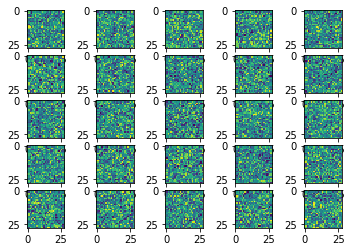

In [7]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

row_max = 10

f, axarr = plt.subplots( 5, 5)

for i in range(0,25):
    a = np.reshape(final_weights['w1'][:,i], (28, 28))
    axarr[int(i/5),i%5].imshow(a)
    
plt.show()

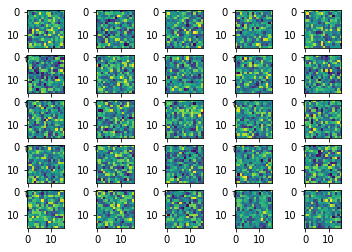

In [8]:
f, axarr = plt.subplots( 5, 5)

for i in range(0,25):
    a = np.reshape(final_weights['w3'][:,i], (16, 16))
    axarr[int(i/5),i%5].imshow(a)
    
plt.show()

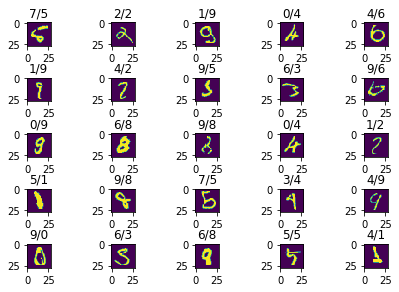

In [9]:
wrong_pred = mnist.test.images[correct == False]

f, axarr = plt.subplots( 5, 5)
f.tight_layout()

Y_true = np.argmax(mnist.test.labels, 1)[correct == False]
    
for i in range(0,25):
    a = np.reshape(wrong_pred[i], (28, 28))
    axarr[int(i/5),i%5].imshow(a)
    axarr[int(i/5),i%5].set_title(f"{_pred[i]}/{Y_true[i]}") 
    
plt.show()

### Let's try a different config this time!

In [25]:
n_input = 784   # input layer (28x28 pixels)
n_hidden1 = 1024 # 1st hidden layer
n_hidden2 = 512 # 2nd hidden layer
n_hidden3 = 256 # 3rd hidden layer
n_hidden4 = 128 # 3rd hidden layer
n_output = 10   # output layer (0-9 digits)

learning_rate = 1e-4
n_iterations = 4000
batch_size = 128
dropout = 0.5
regularization = 1e-2

X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
keep_prob = tf.placeholder(tf.float32) 

weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden1], stddev=0.1)),
    'w2': tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2], stddev=0.1)),
    'w3': tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3], stddev=0.1)),
    'w4': tf.Variable(tf.truncated_normal([n_hidden3, n_hidden4], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal([n_hidden4, n_output], stddev=0.1)),
}

biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden1])),
    'b2': tf.Variable(tf.constant(0.1, shape=[n_hidden2])),
    'b3': tf.Variable(tf.constant(0.1, shape=[n_hidden3])),
    'b4': tf.Variable(tf.constant(0.1, shape=[n_hidden4])),
    'out': tf.Variable(tf.constant(0.1, shape=[n_output]))
}

layer_1 = tf.nn.relu(tf.add(tf.matmul(X, weights['w1']), biases['b1']))
layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['w2']), biases['b2']))
layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['w3']), biases['b3']))
layer_4 = tf.nn.relu(tf.add(tf.matmul(layer_3, weights['w4']), biases['b4']))
layer_drop   = tf.nn.dropout(layer_4, keep_prob)
output_layer = tf.matmul(layer_drop, weights['out']) + biases['out']

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=output_layer))

l2norm  = tf.nn.l2_loss( weights['w1'] )
l2norm += tf.nn.l2_loss( weights['w2'] )
l2norm += tf.nn.l2_loss( weights['w3'] )
l2norm += tf.nn.l2_loss( weights['w4'] )
l2norm += tf.nn.l2_loss( weights['out'])

loss = cross_entropy + 0.5 * l2norm * regularization

# train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)

correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
pred = tf.argmax(output_layer, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    # train on mini batches
    for i in range(n_iterations):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_step, feed_dict={X: batch_x, Y: batch_y, keep_prob:dropout})
    
        # print loss and accuracy (per minibatch)
        if i%100==0:
            minibatch_loss, minibatch_accuracy = sess.run([cross_entropy, accuracy], feed_dict={X: batch_x, Y: batch_y, keep_prob:1.0})
            print("Iteration", str(i), "\t| Loss =", str(minibatch_loss), "\t| Accuracy =", str(minibatch_accuracy))
            
    test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob:1.0})
    
    final_weights = {
        'w1': sess.run( weights['w1'] ),
        'w2': sess.run( weights['w2'] ),
        'w3': sess.run( weights['w3'] ),
        'w4': sess.run( weights['w4'] ),
        'out': sess.run( weights['out'] )
    }
    
    correct = sess.run(correct_pred, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob:1.0})
    
    _pred = sess.run(pred, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob:1.0})
    
    print("\nAccuracy on test set:", test_accuracy)

Iteration 0 	| Loss = 3.1795998 	| Accuracy = 0.09375
Iteration 100 	| Loss = 0.74224865 	| Accuracy = 0.78125
Iteration 200 	| Loss = 0.36841136 	| Accuracy = 0.90625
Iteration 300 	| Loss = 0.22538143 	| Accuracy = 0.9296875
Iteration 400 	| Loss = 0.39808872 	| Accuracy = 0.90625
Iteration 500 	| Loss = 0.2177148 	| Accuracy = 0.9375
Iteration 600 	| Loss = 0.17694709 	| Accuracy = 0.953125
Iteration 700 	| Loss = 0.18989849 	| Accuracy = 0.953125
Iteration 800 	| Loss = 0.15087068 	| Accuracy = 0.9609375
Iteration 900 	| Loss = 0.18978682 	| Accuracy = 0.9453125
Iteration 1000 	| Loss = 0.10611525 	| Accuracy = 0.96875
Iteration 1100 	| Loss = 0.21617444 	| Accuracy = 0.9453125
Iteration 1200 	| Loss = 0.12329058 	| Accuracy = 0.953125
Iteration 1300 	| Loss = 0.13644326 	| Accuracy = 0.953125
Iteration 1400 	| Loss = 0.2018207 	| Accuracy = 0.9296875
Iteration 1500 	| Loss = 0.13791715 	| Accuracy = 0.9765625
Iteration 1600 	| Loss = 0.17507029 	| Accuracy = 0.9453125
Iteration 17

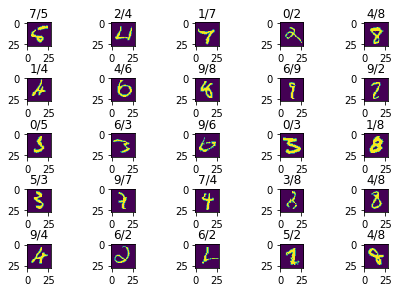

In [26]:
wrong_pred = mnist.test.images[correct == False]

f, axarr = plt.subplots( 5, 5)
f.tight_layout()

Y_true = np.argmax(mnist.test.labels, 1)[correct == False]
    
for i in range(0,25):
    a = np.reshape(wrong_pred[i], (28, 28))
    axarr[int(i/5),i%5].imshow(a)
    axarr[int(i/5),i%5].set_title(f"{_pred[i]}/{Y_true[i]}") 
    
plt.show()